# Coordinate descent for least squares

Author: Alexandre Gramfort

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import time

## Generate simulated data

$y = xw+b+noise$

In [2]:
np.random.seed(0)
n_samples, n_features = 300, 100
A = np.random.randn(n_samples, n_features)
x = np.random.randn(n_features)
y = np.dot(A, x)
y += 0.3 * np.random.randn(n_samples)

In [3]:
x.max()

2.3138236130400816

## Option 1 : 

$\min_w \frac{1}{2} \|y - Ax\|^2$

solved with `linalg.solve`

In [4]:
x_solve = linalg.solve(np.dot(A.T, A), np.dot(A.T, y))

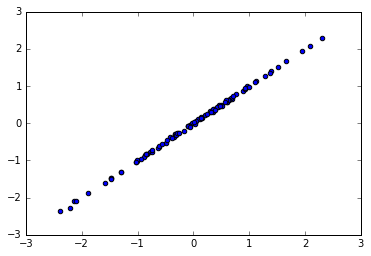

In [5]:
plt.scatter(x, x_solve);

In [6]:
((x - x_solve) / x).mean()

0.0013934559960082035

## Option 2: gradient descent

0.0651557445526123


C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log10
C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: invalid value encountered in log10


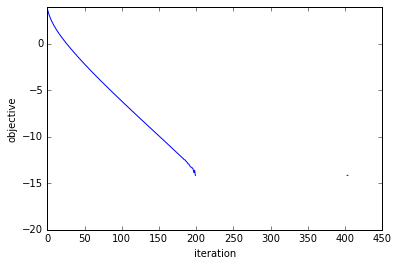

In [12]:
def gradient(x):
    return np.dot(A.T, np.dot(A, x) - y)

def objective(x):
    return linalg.norm(np.dot(A, x) - y) ** 2
start = time.time()
gram = np.dot(A.T, A)
L = linalg.norm(gram, ord=2)

n_iter = 500

x_hat = np.zeros_like(x)
objs = list()
for k in range(n_iter):
    x_hat -= 1. / L * gradient(x_hat)
    objs.append(objective(x_hat))

plt.plot(np.log10(np.array(objs) - objective(x_solve)))
plt.xlabel('iteration')
plt.ylabel('objective')
plt.ylim(-20, 4)
print(time.time() - start)

## Option 3: cyclic coordinate descent

In [8]:
np.zeros_like(x)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

1.290412187576294


C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: divide by zero encountered in log10
C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in log10


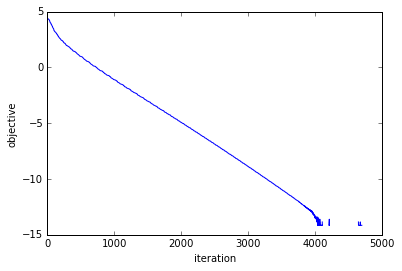

In [15]:
start = time.time()
Li = np.sum(A * A, axis=0)

n_iter = 300 * n_features

x_hat = np.zeros_like(x)
objs = list()
for k in range(n_iter):
    i = k % n_features
    x_hat[i] = np.dot(A[:, i].T, y - np.dot(A, x_hat) + x_hat[i] * A[:, i])
    x_hat[i] /= np.dot(A[:, i], A[:, i])
    objs.append(objective(x_hat))

plt.plot(np.log10(np.array(objs) - objective(x_solve)))
plt.xlabel('iteration')
plt.ylabel('objective')
plt.xlim(0, 5000)
print(time.time() - start)

### or written in a more generic manner:

1.110954999923706


C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in log10
C:\Users\Peter martigny\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in log10


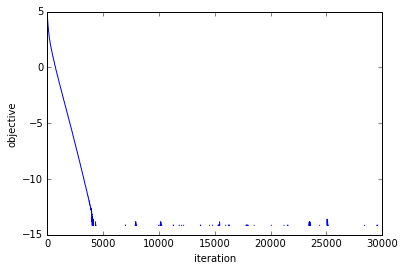

In [16]:
def gradient_i(x, i):
    return np.dot(A[:, i].T, np.dot(A, x) - y)

start = time.time()
Li = np.sum(A * A, axis=0)

n_iter = 300 * n_features

x_hat = np.zeros_like(x)
objs = list()
for k in range(n_iter):
    i = k % n_features
    x_hat[i] -= 1. / Li[i] * gradient_i(x_hat, i)
    objs.append(objective(x_hat))

plt.plot(np.log10(np.array(objs) - objective(x_solve)))
plt.xlabel('iteration')
plt.ylabel('objective')
print(time.time() - start)